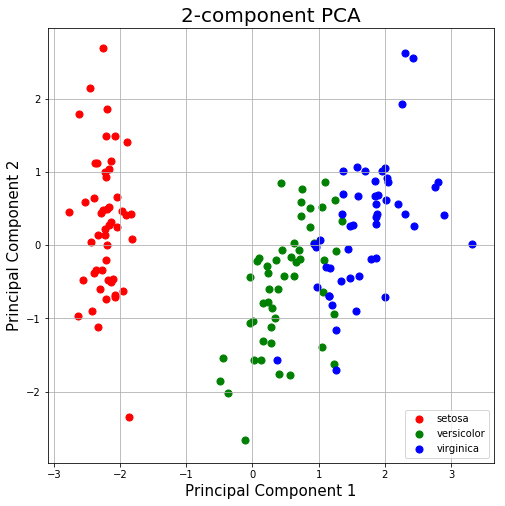

In [5]:
# 4.2 Dimension reduction

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

x = iris.drop("species", axis=1)
y = iris["species"]

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2,random_state=0)
pCs = pca.fit_transform(x)

df = pd.DataFrame(data = pCs, columns = ['PC 1','PC 2'])
df = pd.concat([df, y], axis = 1 )


# #########
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(species,colors):
    indices = df['species'] == target
    ax.scatter(df.loc[indices, 'PC 1'], df.loc[indices, 'PC 2'], c = color, s = 50)
ax.legend(species)
ax.grid()


In [8]:
## 4.3 Cross-validation
import numpy as np
from sklearn import svm, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
x = iris.drop("species", axis=1)
y = iris["species"]

x = MinMaxScaler().fit_transform(x)

svc = svm.SVC(kernel='linear', C=1, gamma='auto')
k_fold = KFold(n_splits=150)
results = cross_val_score(svc, x, y, cv=k_fold)
print(np.mean(results),np.std(results))

loo = LeaveOneOut()
total = []
count = 0
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    total.append(acc)

print (np.mean(total), np.std(total))
    


0.96 0.19595917942265423
0.96 0.19595917942265423


C:\Users\Gebruiker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


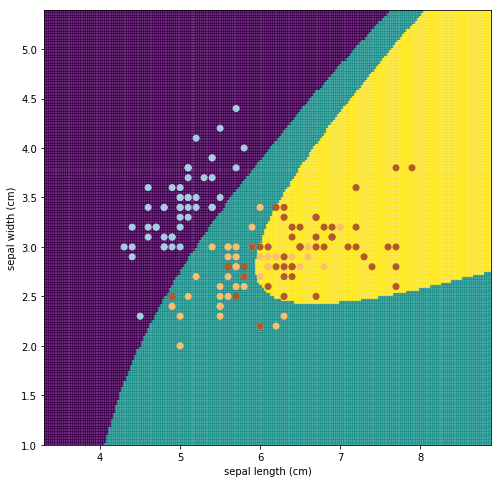

In [9]:
## 4.4 Visualizing boundaries of a supervised ML
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data[:,:2], columns=iris.feature_names[:2])
y = pd.DataFrame(iris.target, columns = ["species"], dtype='category')

svc = svm.SVC(kernel='poly', C=100, gamma=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0) 
svc.fit(x_train,y_train)


# # create a mesh to plot in
x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.pcolormesh(xx, yy, Z, alpha=0.8)
ax.scatter(x.iloc[:,0], x.iloc[:,1], c=y['species'].cat.codes, cmap=plt.cm.Paired)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
plt.show()

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0, 0.5, 'Sepal width')

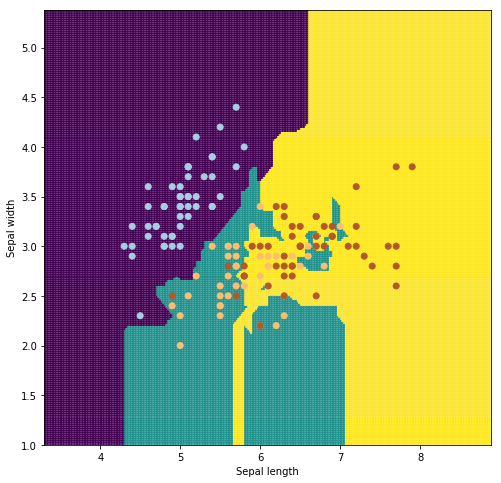

In [11]:
# 4.6 K-Means Clustering and K-nearest Neighbors

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data[:,:2], columns=iris.feature_names[:2])
y = pd.DataFrame(iris.target, columns = ["species"],dtype='category')

kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(x)
kmeans_predict = kmeans.predict(x)


### KNN Example
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0) 

knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1)
knn.fit(x_train,y_train)

knn_predict = knn.predict(x_test)
knn.score(x_test,y_test)

# # Visualize
h = .02
x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.pcolormesh(xx, yy, Z, alpha=0.8)
ax.scatter(x.iloc[:,0], x.iloc[:,1], c=y['species'].cat.codes, cmap=plt.cm.Paired)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')



In [3]:
### 4.5 Random Forests
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load data and process
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns = ["species"])

rF = RandomForestClassifier(n_estimators=100)

# Scale and Reduce
# ... 

# Train
rF.fit(x,y)

# Cross-validate
# ...

estimators = rF.estimators_[1] # Select a tree from the forest

# Visualize the decision tree
# Represent visualization as dot file
export_graphviz(estimators, out_file='tree.dot', 
                feature_names = list(x),
                class_names = iris.target_names,
                rounded = True, precision = 2, 
                filled = True)

### Convert to png using system command (requires Graphviz)
call(['C:\\Users\\Gebruiker\\Anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz\\dot.exe', '-Tpng', 'tree.dot', '-o', 'tree.png'])


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0

![title](tree.png)

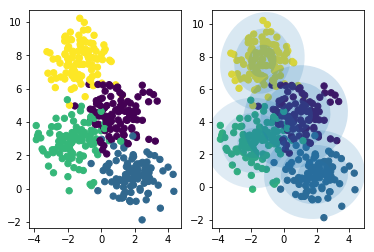

In [9]:
# 4.7

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import sklearn.mixture as gmm


X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=0)

model = gmm.GaussianMixture(n_components=4, warm_start=False, init_params = 'kmeans')
model.fit(X)

y_predict = model.score(X)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = y_true, s=40, cmap='viridis')
plt.axis('equal')

plt.subplot(1, 2, 2)
ax = plt.gca()

ax.scatter(X[:,0], X[:,1], c = y_true, s=40, cmap='viridis')

ax.axis('equal')

w_factor = 0.2 / model.weights_.max()

for pos, covar, weights in zip(model.means_, model.covariances_, model.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw the Ellipse
    for center in range(1, 4):
        ax.add_patch(Ellipse(pos, center * width, center * height, angle, alpha = weights * w_factor))

plt.show()

In [8]:
### Problem Section
# Determine how many folds is necessary to achieve the highest accuracy on a ML algorithm of your choice
# You must train your model on a parameter for a range of values within a fold before performing accuracy assessment
# You must process and validate your data using the steps described in chapter sections

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns = ["species"],dtype='category')

scaler = StandardScaler()
# scaler
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2,random_state=0)
pCs = pca.fit_transform(x_scaled)

x_scaled = pd.DataFrame(data = pCs, columns = ['PC 1', 'PC 2'])
x_scaled = pd.concat([x_scaled, y], axis = 1 )

kf = KFold(n_splits=5)
kf.get_n_splits(x)

run = 1
for train_index, test_index in kf.split(x):
    x_train = x_scaled.iloc[train_index,:] 
    y_train = y.iloc[train_index,:]
    x_test = x_scaled.iloc[test_index,:]
    y_test = y.iloc[test_index,:]
    
    for K in range(1,11):
        kNR = KNeighborsRegressor(n_neighbors = K)
        kNR.fit(x_train, y_train)
#         prediction = kNR.predict(x_test)
        score = kNR.score(x_test,y_test)
        print("Fold: %s, Neighbors: %s, Score: %s" % (run, K, score))

    run += 1


Fold: 1, Neighbors: 1, Score: 1.0
Fold: 1, Neighbors: 2, Score: 1.0
Fold: 1, Neighbors: 3, Score: 1.0
Fold: 1, Neighbors: 4, Score: 1.0
Fold: 1, Neighbors: 5, Score: 1.0
Fold: 1, Neighbors: 6, Score: 1.0
Fold: 1, Neighbors: 7, Score: 1.0
Fold: 1, Neighbors: 8, Score: 1.0
Fold: 1, Neighbors: 9, Score: 1.0
Fold: 1, Neighbors: 10, Score: 1.0
Fold: 2, Neighbors: 1, Score: 1.0
Fold: 2, Neighbors: 2, Score: 1.0
Fold: 2, Neighbors: 3, Score: 1.0
Fold: 2, Neighbors: 4, Score: 1.0
Fold: 2, Neighbors: 5, Score: 1.0
Fold: 2, Neighbors: 6, Score: 1.0
Fold: 2, Neighbors: 7, Score: 0.9969387755102039
Fold: 2, Neighbors: 8, Score: 0.99765625
Fold: 2, Neighbors: 9, Score: 0.9925925925925926
Fold: 2, Neighbors: 10, Score: 0.9849999999999999
Fold: 3, Neighbors: 1, Score: 1.0
Fold: 3, Neighbors: 2, Score: 0.0
Fold: 3, Neighbors: 3, Score: 0.0
Fold: 3, Neighbors: 4, Score: 0.0
Fold: 3, Neighbors: 5, Score: 0.0
Fold: 3, Neighbors: 6, Score: 0.0
Fold: 3, Neighbors: 7, Score: 0.0
Fold: 3, Neighbors: 8, Score